In [1]:
import pandas as pd
import glob
import re
import os

In [2]:


# Path to the directory containing the CSV files
# Replace this with your directory path
path = './linear_model'  # Current directory, modify as needed

# Get all CSV files that match the pattern
csv_files = glob.glob(os.path.join(path, 'qhaplo_*qtl_*n_scklrr_corr_summary.txt'))

# Create an empty list to store individual dataframes
dfs = []

# Process each file
for file in csv_files:
    # Extract the filename from the path
    filename = os.path.basename(file)

    # Extract parameters using regex
    # Pattern looks for numbers after 'qtl_' and before 'n_'
    qtl_match = re.search(r'(\d+)qtl', filename)
    n_match = re.search(r'(\d+)n', filename)

    if qtl_match and n_match:
        qtl_value = int(qtl_match.group(1))
        n_value = int(n_match.group(1))

        # Read the CSV file
        df = pd.read_csv(file)

        # Add columns for the parameters
        df['qtl_param'] = qtl_value
        df['n_param'] = n_value

        # Add the dataframe to our list
        dfs.append(df)
    else:
        print(f"Couldn't extract parameters from {filename}")

# Combine all dataframes into one
if dfs:
    linear_df = pd.concat(dfs, ignore_index=True)

    # Display the first few rows of the combined dataframe
    print(linear_df.head())

    # Save the combined dataframe to a new CSV if needed
    # combined_df.to_csv('combined_summary.csv', index=False)
else:
    print("No matching files found or parameters couldn't be extracted")

   trait  pearson_corr_pheno_mean  pearson_corr_pheno_std  \
0      1                 0.999448                0.000028   
1      2                 0.451642                0.021974   
2      1                 0.999498                0.000026   
3      2                 0.595083                0.021236   
4      1                 0.999499                0.000007   

   pearson_corr_beta_mean  pearson_corr_beta_std  best_lambda_mean  \
0                0.999936           1.199741e-06          0.220513   
1                0.869200           2.664051e-03        599.484250   
2                0.999995           3.034676e-07          0.021544   
3                0.989694           9.830175e-04         46.415888   
4                0.999994           1.606871e-07          0.266707   

   best_lambda_std  qtl_param  n_param  
0     0.000000e+00       1000    10000  
1     1.198364e-13       1000    10000  
2     0.000000e+00        100    10000  
3     0.000000e+00        100    10000  
4     2

In [3]:


# Path to the directory containing the CSV files
# Replace this with your directory path
path = './gpnet'  # Current directory, modify as needed

# Get all CSV files that match the pattern
csv_files = glob.glob(os.path.join(path, 'qhaplo_*qtl_*n_phenotype_correlations.csv'))

# Create an empty list to store individual dataframes
dfs = []

# Process each file
for file in csv_files:
    # Extract the filename from the path
    filename = os.path.basename(file)

    # Extract parameters using regex
    # Pattern looks for numbers after 'qtl_' and before 'n_'
    qtl_match = re.search(r'(\d+)qtl', filename)
    n_match = re.search(r'(\d+)n', filename)

    if qtl_match and n_match:
        qtl_value = int(qtl_match.group(1))
        n_value = int(n_match.group(1))

        # Read the CSV file
        df = pd.read_csv(file)

        # Add columns for the parameters
        df['qtl_param'] = qtl_value
        df['n_param'] = n_value

        # Add the dataframe to our list
        dfs.append(df)
    else:
        print(f"Couldn't extract parameters from {filename}")

# Combine all dataframes into one
if dfs:
    neural_df = pd.concat(dfs, ignore_index=True)

    # Display the first few rows of the combined dataframe
    print(neural_df.head())

    # Save the combined dataframe to a new CSV if needed
    # combined_df.to_csv('combined_summary.csv', index=False)
else:
    print("No matching files found or parameters couldn't be extracted")

   trait_number  pearson_correlation  true_mean  pred_mean  true_std  \
0             1             0.996845  -0.002230  -0.031777  1.747708   
1             2             0.441179  -0.014289  -0.128577  1.703334   
2             1             0.999158  -0.009351   0.303731  1.743588   
3             2             0.967111   0.004643   0.246712  1.714068   
4             1             0.721022  -0.075494  -0.081117  1.656103   

   pred_std  qtl_param  n_param  
0  1.717236       1000    10000  
1  0.874523       1000    10000  
2  1.753729        100   100000  
3  1.377502        100   100000  
4  1.091029       1000     1000  


In [4]:
linear_df.rename(columns={'pearson_corr_pheno_mean':'pearson_correlation'}, inplace=True)
linear_df.rename(columns={'trait':'trait_number'}, inplace=True)
neural_df.rename(columns={'pearson_correlation':'pearson_correlation'}, inplace=True)


In [5]:
neural_df

,trait_number,pearson_correlation,true_mean,pred_mean,true_std,pred_std,qtl_param,n_param
0,1,0.996845,-0.002230,-0.031777,1.747708,1.717236,1000,10000
1,2,0.441179,-0.014289,-0.128577,1.703334,0.874523,1000,10000
2,1,0.999158,-0.009351,0.303731,1.743588,1.753729,100,100000
3,2,0.967111,0.004643,0.246712,1.714068,1.377502,100,100000
4,1,0.721022,-0.075494,-0.081117,1.656103,1.091029,1000,1000
5,2,0.282127,0.125464,-0.272389,1.757568,0.952211,1000,1000
6,1,0.996681,-0.069176,0.076273,1.808154,1.727680,100,1000
7,2,0.551516,-0.103872,0.039633,1.774255,1.187306,100,1000
8,1,0.998371,0.017076,0.004979,1.733299,1.789565,1000,100000
9,2,0.567536,-0.023328,-0.014467,1.731667,1.374103,1000,100000


In [6]:
def get_parameter_combinations(df1, df2):
    # Get all unique combinations from both dataframes
    params1 = df1[['qtl_param', 'n_param', 'trait_number']].drop_duplicates()
    params2 = df2[['qtl_param', 'n_param', 'trait_number']].drop_duplicates()

    # Find common combinations using merge
    common_params = pd.merge(params1, params2, on=['qtl_param', 'n_param', 'trait_number'])

    return common_params

# Get common parameter combinations
common_params = get_parameter_combinations(linear_df, neural_df)


In [7]:
comparison_data = []

for _, row in common_params.iterrows():
    qtl = row['qtl_param']
    n = row['n_param']
    trait = row['trait_number']

    linear_row = linear_df[(linear_df['qtl_param'] == qtl) &
                           (linear_df['n_param'] == n) &
                           (linear_df['trait_number'] == trait)]

    neural_row = neural_df[(neural_df['qtl_param'] == qtl) &
                           (neural_df['n_param'] == n) &
                           (neural_df['trait_number'] == trait)]

    if not linear_row.empty and not neural_row.empty:
        comparison_data.append({
            'qtl_param': qtl,
            'n_param': n,
            'trait_number': trait,
            'linear_correlation': linear_row['pearson_correlation'].values[0],
            'neural_correlation': neural_row['pearson_correlation'].values[0],
            'difference': neural_row['pearson_correlation'].values[0] - linear_row['pearson_correlation'].values[0]
        })

comparison_df = pd.DataFrame(comparison_data)

# Display the comparison dataframe
print("Comparison of Linear and Neural Network Models:")
comparison_df


Comparison of Linear and Neural Network Models:


,qtl_param,n_param,trait_number,linear_correlation,neural_correlation,difference
0,1000,10000,1,0.999448,0.996845,-0.002603
1,1000,10000,2,0.451642,0.441179,-0.010464
2,100,10000,1,0.999498,0.998777,-0.000721
3,100,10000,2,0.595083,0.971322,0.376239
4,1000,100000,1,0.999499,0.998371,-0.001128
5,1000,100000,2,0.564030,0.567536,0.003505
6,100,1000,1,0.999454,0.996681,-0.002773
7,100,1000,2,0.464824,0.551516,0.086692
8,1000,1000,1,0.897240,0.721022,-0.176218
9,1000,1000,2,0.300285,0.282127,-0.018158


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_difference_heatmap(comparison_df):
    # Pivot the data to create a heatmap
    # We need to have qtl_param and n_param as indices, and trait_number as columns
    pivoted_data = comparison_df.pivot_table(
        index=['qtl_param', 'n_param'],
        columns='trait_number',
        values='difference',
        aggfunc='mean'  # In case there are duplicates
    )

    # Create the heatmap
    plt.figure(figsize=(10, 8))
    heatmap = sns.heatmap(
        pivoted_data,
        annot=True,
        cmap='RdBu_r',  # Red-Blue colormap, reversed (blue for positive)
        center=0,       # Center the colormap at 0
        fmt='.3f',      # Format annotations to 3 decimal places
        linewidths=.5,  # Add lines between cells
        cbar_kws={'label': 'Difference (Neural - Linear)'}
    )

    plt.title('Difference in Pearson Correlation (Neural Network - Linear Model)', fontsize=14, pad=20)
    plt.xlabel('Trait Number', fontsize=12, labelpad=10)
    plt.ylabel('Parameter Combination (qtl_param, n_param)', fontsize=12, labelpad=10)

    plt.tight_layout()
    return plt.gcf()

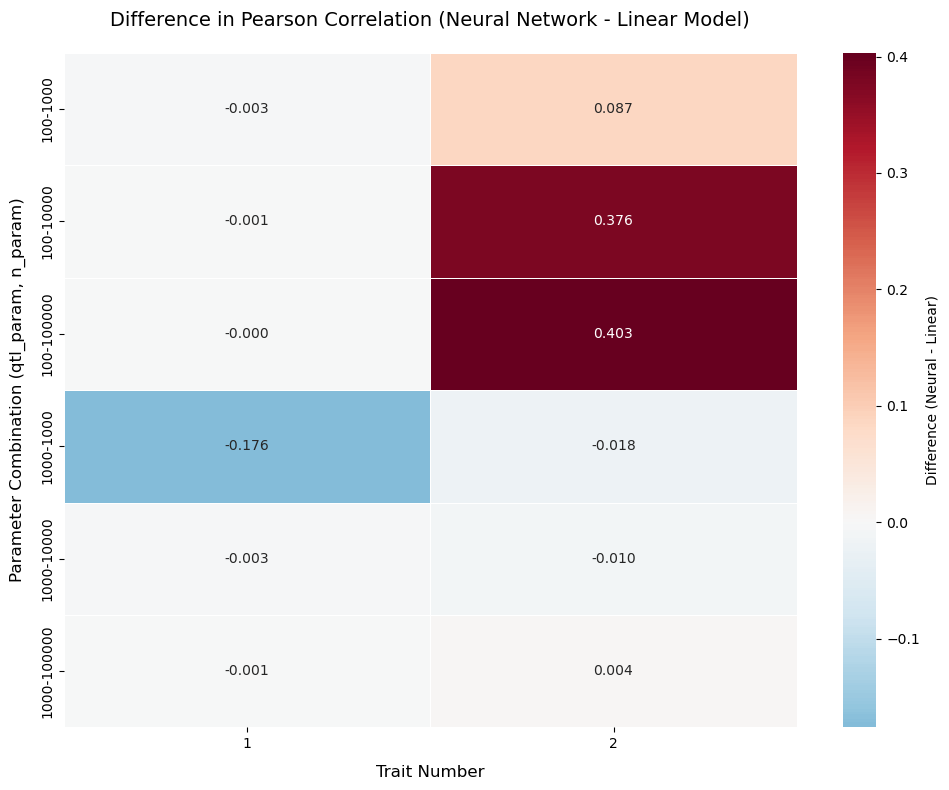

In [9]:
heatmap_plot = plot_difference_heatmap(comparison_df)
plt.show()

# 6. Create a summary table with styled highlighting
def create_styled_summary(comparison_df):
    # Create a copy of the dataframe for styling
    styled_df = comparison_df.copy()

    # Add a new column to indicate which model is better
    styled_df['better_model'] = styled_df['difference'].apply(
        lambda x: 'Neural Network' if x > 0 else 'Linear Model' if x < 0 else 'Equal'
    )

    # Sort by trait_number, qtl_param, and n_param
    styled_df = styled_df.sort_values(['trait_number', 'qtl_param', 'n_param'])

    # Style the dataframe
    def highlight_better_model(val):
        if val == 'Neural Network':
            return 'background-color: #d4f1f9'  # Light blue
        elif val == 'Linear Model':
            return 'background-color: #f9d4d4'  # Light red
        return ''

    def highlight_difference(val):
        if val > 0:
            return f'color: blue; font-weight: bold'
        elif val < 0:
            return f'color: red; font-weight: bold'
        return ''

    # Apply styling
    styled = styled_df.style.applymap(highlight_better_model, subset=['better_model']) \
                         .applymap(highlight_difference, subset=['difference']) \
                         .format({
                             'linear_correlation': '{:.4f}',
                             'neural_correlation': '{:.4f}',
                             'difference': '{:+.4f}'  # Add + sign for positive values
                         })

    return styled